
# Model

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



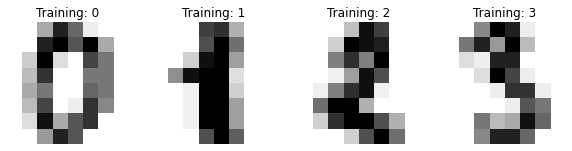

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
digits.target.shape

(1797,)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
print(X_train[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



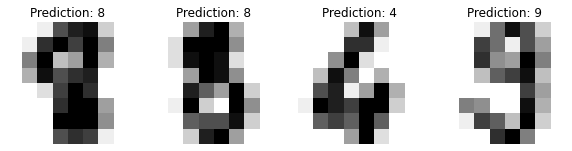

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


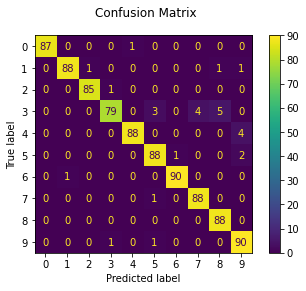

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#Predict image from camera

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Take a photo from the webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
# from IPython.display import Image
# for count_image in range(30):
#     try:
#       filename = take_photo()
#       print('Saved to {}'.format(filename))
#       image_source = cv2.imread('/content/photo.jpg')
#       cv2.imwrite('/content/images/image_' + str(count_image) + '.jpg', image_source)
#       # Show the image which was just taken.
#       # display(Image(filename))
#
#     except Exception as err:
#       # Errors will be thrown if the user does not have a webcam or if they do not
#       # grant the page permission to access it.
#       print(str(err))

##Load testset

In [ ]:
 !gdown --id 1QkpsI8bqAfnnv4KpMLC0UEvoYeZ3U2Vy

Downloading...
From: https://drive.google.com/uc?id=1QkpsI8bqAfnnv4KpMLC0UEvoYeZ3U2Vy
To: /content/images.zip
100% 849k/849k [00:00<00:00, 13.4MB/s]


In [ ]:
 !unzip /content/images.zip -d /content

Archive:  /content/images.zip
   creating: /content/images/.ipynb_checkpoints/
  inflating: /content/images/image_0.jpg  
  inflating: /content/images/image_1.jpg  
  inflating: /content/images/image_10.jpg  
  inflating: /content/images/image_11.jpg  
  inflating: /content/images/image_12.jpg  
  inflating: /content/images/image_13.jpg  
  inflating: /content/images/image_14.jpg  
  inflating: /content/images/image_15.jpg  
  inflating: /content/images/image_16.jpg  
  inflating: /content/images/image_17.jpg  
  inflating: /content/images/image_18.jpg  
  inflating: /content/images/image_19.jpg  
  inflating: /content/images/image_2.jpg  
  inflating: /content/images/image_20.jpg  
  inflating: /content/images/image_21.jpg  
  inflating: /content/images/image_22.jpg  
  inflating: /content/images/image_23.jpg  
  inflating: /content/images/image_24.jpg  
  inflating: /content/images/image_25.jpg  
  inflating: /content/images/image_26.jpg  
  inflating: /content/images/image_27.jpg  


In [ ]:
all_image = ['/content/images/image_' + str(image_index) + '.jpg' for image_index in range(29)]

In [ ]:
Xtest = []
for image_name in all_image: 
  image = cv2.imread(image_name, 0)
  Xtest.append(image)  

In [ ]:
Xtest = np.array(Xtest)

In [ ]:
Ytest = np.array([8, 7, 9, 0, 1, 2, 3, 4, 5, 3, 9, 8, 3, 7, 2, 1, 9, 6, 4, 7, 1, 2, 5, 8, 4, 1, 9, 3, 6])

In [ ]:
print(Xtest.shape)
print(Ytest.shape)

(29, 480, 640)
(29,)


Dataset gồm 29 ảnh, mỗi ảnh dạng grayscale với kích thước 480x640

##Preprocessing

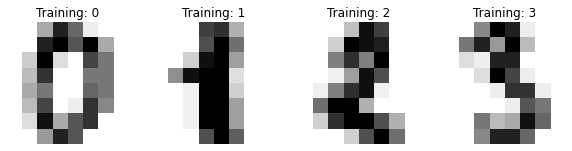

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

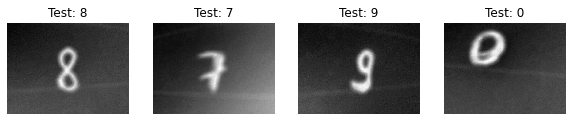

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, Xtest, Ytest):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Test: %i" % label)

In [ ]:
print(Xtest[0].shape)
print(digits.data[0].shape)

(480, 640)
(64,)


In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
Xtest[0]

array([[176, 175, 175, ..., 142, 147, 151],
       [175, 175, 174, ..., 139, 142, 145],
       [177, 176, 175, ..., 139, 140, 142],
       ...,
       [129, 132, 133, ..., 137, 138, 139],
       [130, 135, 136, ..., 138, 139, 141],
       [129, 135, 137, ..., 137, 138, 140]], dtype=uint8)

In [ ]:
print(digits.data.max())
print(digits.data.min())

16.0
0.0


In [ ]:
print(Xtest.max())
print(Xtest.min())

255
0


So sánh ảnh chụp từ camera và ảnh trong digits.data:
 - Ảnh trong tập train được cắt sát với biên của ảnh -> cần cắt ảnh test của ta như vậy.
 - Màu nền, màu chữ của tập test đối lập hoàn toàn với tập train -> finetune lại.   
 - Shape của ảnh train và test không giống nhau -> resize lại.
 - Scale các giá trị pixcel trong ảnh test về tương đương với ảnh train.

###Crop Image.

---


  Ý tưởng đưa ra: Crop ảnh theo hình chữ nhật với 4 tham số Top, Bot, Left và Right. Xác định bằng cách tìm các tọa độ các Pixel của Major Object, chọn Top-Bot-Left-Right để chứa toàn bộ Pixel. 
  - Nét chữ sẽ đậm hơn màu nền, nét chữ đập nhất hay có Pixel có giá thấp nhất--> Pixel giá trị thấp nhất là của Major Object.
  - Nét có độ thanh, đậm khác nhau thường có những nét hơi nhạt hơn --> Những Pixel có giá trị lớn hơn min một ngưỡng nhất định vẫn thuộc Major Object.

In [ ]:
def cropping(data):
  min = data.min()
  #Chia thang màu 5 mức từ đậm đến nhạt, Chọn ngưỡng tại phần giao giữa mức 2 & 3
  threshold = (data.max() - min)/5 + min
  n, m = data.shape
  left = m -1
  right = 0
  top = n - 1
  bot = 0 
  for i in range(n):
    for j in range(m):
      if data[i][j] < threshold:
        if j < left:
          left = j
        if i < top :
          top = i
        if j > right:
          right = j
        if i > bot :
          bot = i
  #Vì pixel đậm nhất thường ở giữa nét nên giảm top left, tăng bot right một lượng nhỏ để Crop image tốt hơn
  if top > 4:
    top = top - 5 
  if left > 4:
    left = left - 5 
  if bot < n - 5:
    bot = bot + 5 
  if right < m - 5:
    right = right + 5 
  return data[top:bot, left:right]

###Process background

In [ ]:
# Lấy 1 ảnh làm mẫu để tính toán
curent_image = 0
image = cropping(Xtest[curent_image])

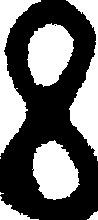

In [ ]:
# Chia thang màu 0-255 thành 5, chọn tresh = 100 để chia thành 2 tối 3 sáng 
ret,image= cv2.threshold(image,100,255,cv2.THRESH_BINARY)
cv2_imshow(image)



---






###Resize Image








In [ ]:
count = 0
for i in  digits.images:
  temp_img = i.reshape(8, 8)
  if temp_img[:, 0].all() == 0 and temp_img[:, 7].all() == 0: 
    count += 1

In [ ]:
count/digits.images.shape[0]

1.0

Tất cả các ảnh trong tập digits.data đều có shape (8,8), nhưng cột 0 và cột 7 trong matrix ảnh đều là giá trị là 0.
Nhưng trong thuật toán cắt ảnh của chúng tôi, mỗi bức ảnh cắt ra đều sát với biên. Việc này vô tình làm cho định dạng tập train và test khác nhau đi, dễ ảnh hưởng tới kết quả dự đoán.

Hướng giải quyết: Reshape mỗi ảnh về (8, 6), sao đó thêm 2 biên vào.

In [ ]:
# image = cv2.resize(image, (6,8))

In [ ]:
image = cv2.resize(image, (192,256))
image = cv2.resize(image, (96,128))
image = cv2.resize(image, (48,64))
image = cv2.resize(image, (24,32))
image = cv2.resize(image, (12,16))
image = cv2.resize(image, (6,8))

In [ ]:
image = 255 - image

In [ ]:
#Thêm Cột 0 & 7
ground = np.zeros((8, 8))
ground[:,1:7] = image
image = ground

In [ ]:
# scale về 0-16
image = np.array(image/image.max() * 16, dtype='uint8')

In [ ]:
image

array([[ 0,  0,  9, 14, 14, 12,  3,  0],
       [ 0,  9, 13,  0,  0, 10, 13,  0],
       [ 0,  7, 13,  0,  2, 14,  6,  0],
       [ 0,  0, 11, 14, 15, 10,  0,  0],
       [ 0,  0, 10, 16, 16,  8,  0,  0],
       [ 0, 11, 16,  5,  3, 13, 10,  0],
       [ 0, 16, 15,  3,  0,  4, 16,  0],
       [ 0,  6, 13, 14, 12, 15, 13,  0]], dtype=uint8)

Text(0.5, 1.0, 'test: 8')

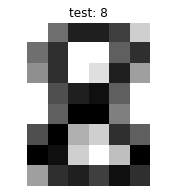

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

axes.set_axis_off()
axes.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
axes.set_title("test: %i" % Ytest[curent_image])

In [ ]:
image_final = image.reshape(1, -1)

In [ ]:
clf.predict(image_final)

array([8])

# Hàm xử lý tổng quát

In [ ]:
xtest_final = []
xtest_crop = []
def main_handle(Xtest):
  for i in Xtest: 
    temp = cropping(i)
    xtest_crop.append(temp)
    ret,temp= cv2.threshold(temp,100,255,cv2.THRESH_BINARY)

    temp = cv2.resize(temp, (75,100))
    temp = cv2.resize(temp, (60,80))
    temp = cv2.resize(temp, (30,40))
    temp = cv2.resize(temp, (15,20))
    temp = cv2.resize(temp, (6,8))

    temp = 255 - temp
    final_img = np.zeros((8, 8))
    final_img[:,1:7] = temp
    
    final_img = np.array(final_img/16, dtype='uint8').reshape(1, -1)
    xtest_final.append(final_img)

In [ ]:
main_handle(Xtest)

In [ ]:
xtest_final = np.array(xtest_final)

In [ ]:
xtest_final = xtest_final.reshape(29, 64)

###Prediction

In [ ]:
pred = clf.predict(xtest_final)

In [ ]:
pred

array([8, 7, 9, 5, 1, 7, 3, 1, 9, 9, 9, 8, 3, 7, 9, 1, 1, 5, 4, 7, 9, 4,
       9, 9, 9, 1, 1, 1, 5])

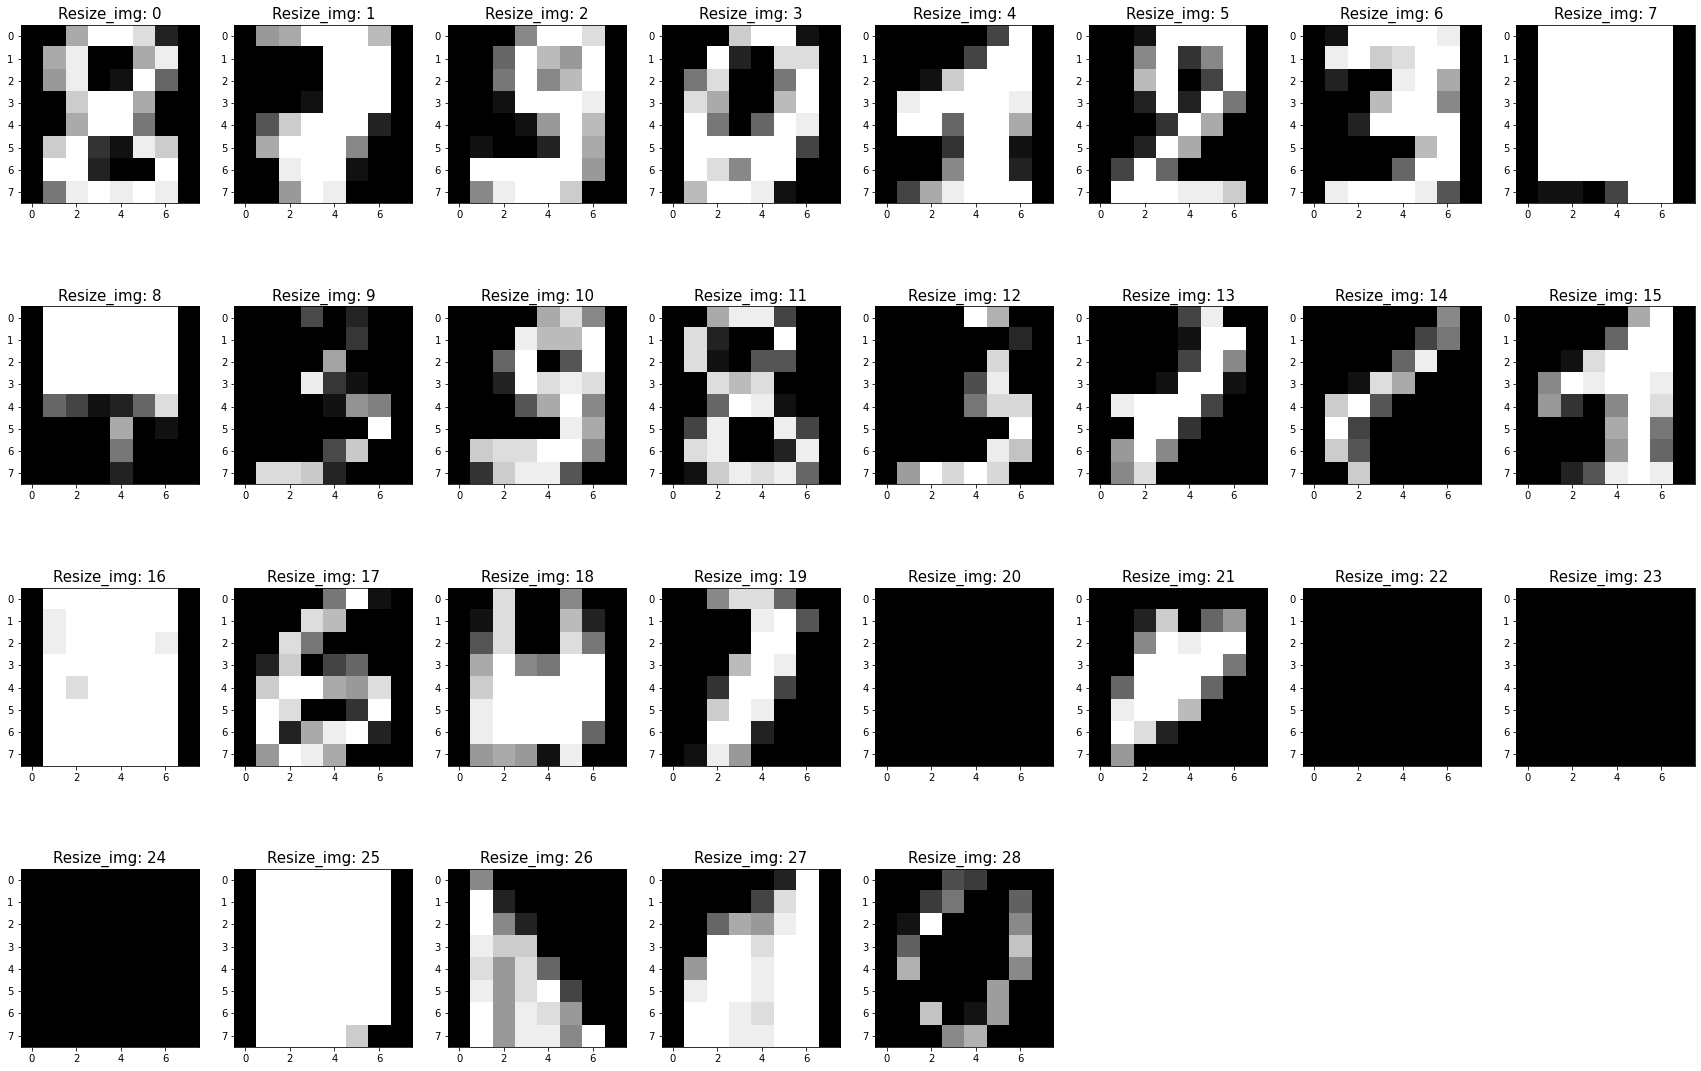

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(29):
    imagenew=xtest_final[i].reshape(8, 8)
    plt.subplot(rows,columns,o)
    plt.title('Resize_img: '+str(i),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

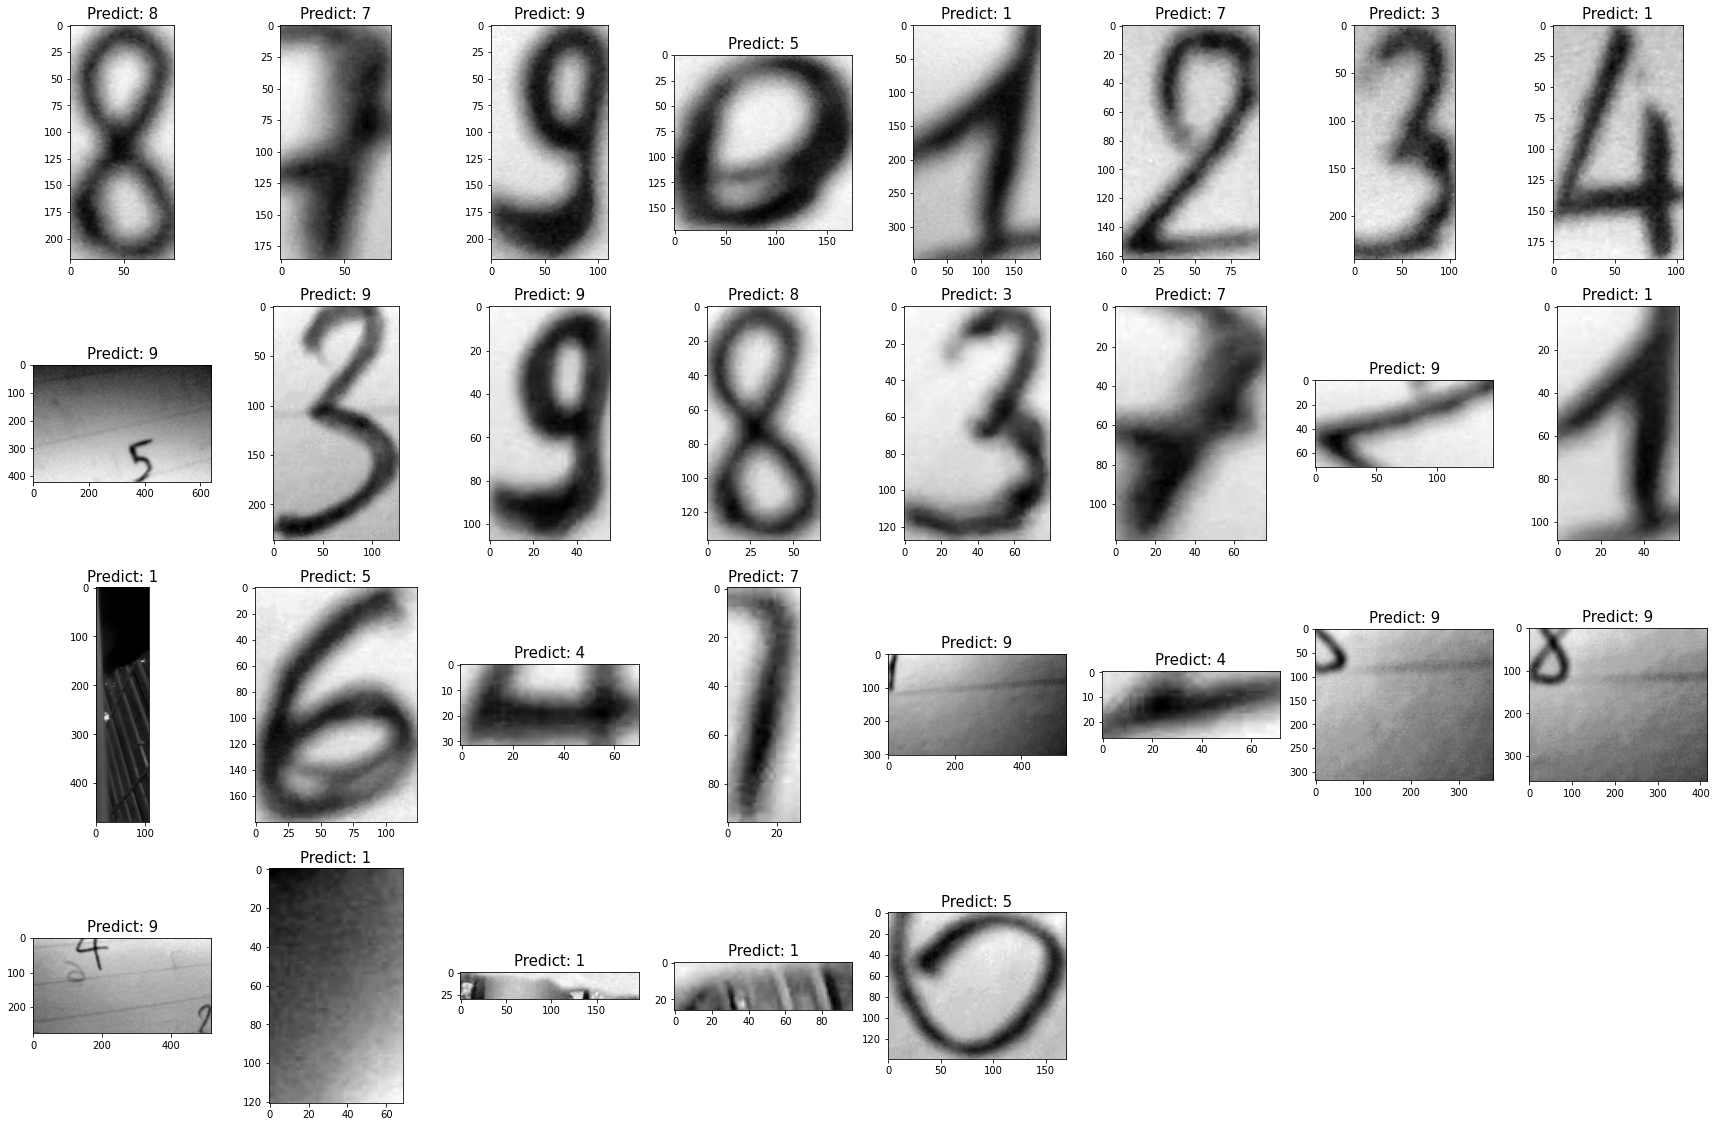

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(29):
    imagenew=xtest_crop[i]
    plt.subplot(rows,columns,o)
    plt.title('Predict: '+str(pred[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

In [ ]:
def display(n):
  fig=plt.figure(figsize=(30, 25))

  plt.subplot(1,3,1)
  plt.title('Final image',fontsize=15)
  plt.imshow(xtest_final[n].reshape(8, 8),cmap='gray')

  plt.subplot(1,3,2)
  plt.title('Crop_img',fontsize=15)
  plt.imshow(xtest_crop[n],cmap='gray')

  plt.subplot(1,3,3)
  plt.title('Source image',fontsize=15)
  image = cv2.imread('/content/images/image_' + str(n) + '.jpg')
  plt.imshow(image,cmap='gray')

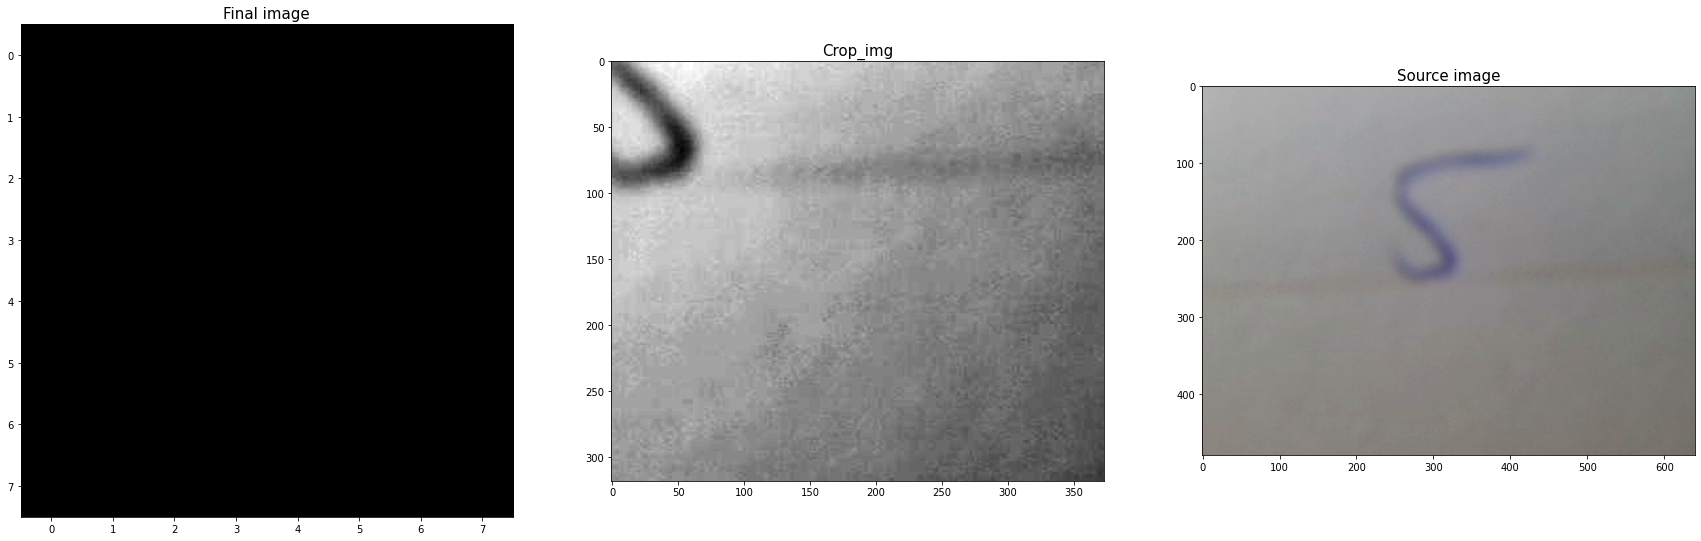

In [ ]:
display(22)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(Ytest, pred, average='macro')

0.3576956376956376

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Ytest, pred)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.43      0.75      0.55         4
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         4
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.75      1.00      0.86         3
           8       1.00      0.67      0.80         3
           9       0.22      0.50      0.31         4

    accuracy                           0.45        29
   macro avg       0.39      0.37      0.36        29
weighted avg       0.46      0.45      0.42        29




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[0 0 0 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 0 1]
 [0 1 0 2 0 0 0 0 0 1]
 [0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 2 1]
 [0 2 0 0 0 0 0 0 0 2]]


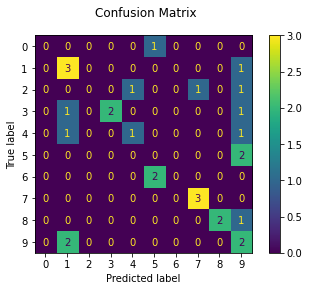

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Ytest, pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Nếu chỉ dự đoán ảnh cắt tốt

In [ ]:
index = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 17, 19]
crop_well = xtest_final[index]
crop_well_label = Ytest[index]

In [ ]:
crop_well_pred = clf.predict(crop_well)

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(crop_well_label, crop_well_pred)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2

    accuracy                           0.69        16
   macro avg       0.41      0.47      0.43        16
weighted avg       0.62      0.69      0.64        16




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Confusion matrix:
[[0 0 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 2 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


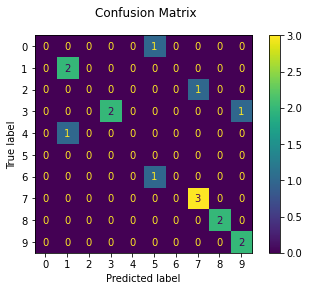

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(crop_well_label, crop_well_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# fig=plt.figure(figsize=(30, 25))
# columns = 8
# rows = 5
# o=1
# for i in range(19):
#     imagenew=crop_well[i].reshape(8, 8)
#     plt.subplot(rows,columns,o)
#     plt.title('Predict: '+str(crop_well_pred[i]),fontsize=15)
#     plt.imshow(imagenew,cmap='gray')
#     o+=1
# plt.show()

Một vài điểm nổi bật trong bài: 

1.   Mô hình dự đoán tốt trên tập test gốc của tác giả, nhưng lại tỏ ra khá tệ khi đi vào thực chiến. Lý do có thể đưa ra là do ảnh của tác giả sau khi cắt không có nhiễu, số nằm ngay trung tâm của ảnh. CÒn chụp từ cam thì khá là khó trong việc cắt ảnh, do nhiễu trong lúc chụp(ánh sáng, màu chữ, kích thước chữ).




Khó khăn trong lúc làm bài⚠

1.   Ảnh chụp từ webcam không đảm bảo đủ điều kiện sáng. Đây là yếu tố chết người trong thuật toán cắt ảnh của chúng tôi.
2.   Chữ nét quá nhạt, khó phân biệt được với background.
3.   Các tham số dùng để phân biệt giữa background và digit chọn khá thủ công, có thể phù hợp với testset này nhưng có thể không hiệu quả với testset kia.

